In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [59]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/POwerCO/FE_data.csv')
data.head()

,id,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p1_fix,price_p2_fix,Price_date Count,churn,channels_ep,channels_ew,channels_fi,channels_fo,channels_lm,channels_sd,channels_us,origin_ewxe,origin_kamk,origin_ldks,origin_lxid,origin_usap,date_activ_year,date_end_year,date_modif_prod_year,date_renewal_year
0,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.0,2.280920,0.0,1.237292,0,0.000000,1.240050,0.350258,1,1.298635,6,13.800,1.649274,0.000000,487.469573,0.000000,12,0,0,0,0,0,0,0,0,0,1,0,0,0,2009,2016,2009,2015
1,764c75f661154dac3a6c254cd082ea7d,2.736397,0.0,1.689841,0.0,1.599009,0,0.000000,1.471292,0.392924,1,0.880814,6,13.856,2.046140,1.061055,532.625404,0.000000,12,0,0,0,0,1,0,0,0,0,1,0,0,0,2010,2016,2010,2015
2,bba03439a292a1e166f80264c16191cb,3.200029,0.0,2.382089,0.0,1.318689,0,0.000000,1.494433,0.396972,1,1.422590,6,13.200,1.814521,0.000000,532.803183,0.000000,12,0,0,0,0,0,1,0,0,0,1,0,0,0,2010,2016,2010,2015
3,568bb38a1afd7c0fc49c77b3789b59a3,5.083990,0.0,4.036071,0.0,2.234871,0,3.022581,0.000000,0.000000,1,2.916022,6,75.000,1.421371,1.177607,488.094958,292.856963,12,0,0,0,0,1,0,0,0,0,0,0,1,0,2010,2016,2010,2015
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.0,2.650065,0.0,2.122969,0,1.726890,1.661907,0.425193,1,1.690019,6,19.800,1.490092,1.243658,488.257873,292.954712,12,0,0,0,0,0,0,0,0,0,1,0,0,0,2010,2016,2010,2015


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14121 entries, 0 to 14120
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        14121 non-null  object 
 1   cons_12m                  14121 non-null  float64
 2   cons_gas_12m              14121 non-null  float64
 3   forecast_cons_12m         14121 non-null  float64
 4   forecast_discount_energy  14121 non-null  float64
 5   forecast_meter_rent_12m   14121 non-null  float64
 6   has_gas                   14121 non-null  int64  
 7   imp_cons                  14121 non-null  float64
 8   margin_gross_pow_ele      14121 non-null  float64
 9   margin_net_pow_ele        14121 non-null  float64
 10  nb_prod_act               14121 non-null  int64  
 11  net_margin                14121 non-null  float64
 12  num_years_antig           14121 non-null  int64  
 13  pow_max                   14121 non-null  float64
 14  price_

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [62]:
d = data.sort_values('churn', ascending= False)
d.head()

,id,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p1_fix,price_p2_fix,Price_date Count,churn,channels_ep,channels_ew,channels_fi,channels_fo,channels_lm,channels_sd,channels_us,origin_ewxe,origin_kamk,origin_ldks,origin_lxid,origin_usap,date_activ_year,date_end_year,date_modif_prod_year,date_renewal_year
12282,99ae4283a037bdfd8cba3ab74aa900e2,4.360839,0.000000,3.359870,0.0,2.115976,0,2.329926,1.286905,0.359248,1,2.453058,5,17.321,1.502954,1.258277,487.932042,292.759214,12,1,0,0,0,1,0,0,0,0,0,0,1,0,2011,2016,2011,2015
5201,3a4459aa87e04f1d39d253f9cd13e197,4.387692,4.564027,3.404305,0.0,2.114010,1,2.300900,1.307710,0.363181,2,2.488917,4,25.097,1.490112,1.242995,488.746620,293.247960,12,1,0,0,0,1,0,0,0,0,0,0,1,0,2012,2016,2014,2015
973,1917f024e8327affa0cf12e7dcff6202,4.510371,0.000000,2.374400,0.0,1.191451,0,0.000000,1.044540,0.310596,1,1.390759,3,10.392,1.779130,0.000000,531.914284,0.000000,12,1,0,0,0,1,0,0,0,0,0,0,1,0,2012,2016,2014,2015
8153,6508097af9093962612c62ddb2febd8f,3.025715,0.000000,2.044853,0.0,2.084254,0,0.000000,1.620760,0.418427,1,1.173186,6,19.800,1.358920,1.140429,448.714426,270.028627,11,1,0,0,0,0,0,0,0,0,1,0,0,0,2009,2016,2009,2015
9689,779ed19c936785f2a37e74cbdd9e5d80,5.987429,0.000000,3.328518,0.0,1.242293,0,2.391588,1.258398,0.353800,1,2.238999,6,10.350,2.019793,1.040966,532.447626,0.000000,12,1,0,0,0,0,0,0,0,0,1,0,0,0,2009,2016,2009,2015


In [63]:
d.shape

(14121, 36)

In [64]:
d[d['churn'] ==1].shape

(1414, 36)

In [65]:
#spliting my data
X_train, X_test, y_train, y_test = train_test_split(d.drop(['churn', 'id'], axis =1), d['churn'], test_size = .3, random_state = 42,)

In [66]:
#creating my model
log_reg = LogisticRegression()
forest = RandomForestClassifier()
boost = XGBClassifier()
naivemodel = GaussianNB(var_smoothing = 0.001)
KNN = KNeighborsClassifier()
supportvm = SVC()

In [67]:
for x in [log_reg, forest, boost, naivemodel, KNN, supportvm]:
  x.fit(X_train, y_train)
  y_pred = x.predict(X_test)
  report = classification_report(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print(report, f1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3814
           1       0.00      0.00      0.00       423

    accuracy                           0.90      4237
   macro avg       0.45      0.50      0.47      4237
weighted avg       0.81      0.90      0.85      4237
 0.0
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3814
           1       0.94      0.04      0.08       423

    accuracy                           0.90      4237
   macro avg       0.92      0.52      0.51      4237
weighted avg       0.91      0.90      0.86      4237
 0.07709750566893425


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3814
           1       0.00      0.00      0.00       423

    accuracy                           0.90      4237
   macro avg       0.45      0.50      0.47      4237
weighted avg       0.81      0.90      0.85      4237
 0.0
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3814
           1       0.00      0.00      0.00       423

    accuracy                           0.90      4237
   macro avg       0.45      0.50      0.47      4237
weighted avg       0.81      0.90      0.85      4237
 0.0
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3814
           1       0.31      0.04      0.07       423

    accuracy                           0.90      4237
   macro avg       0.61      0.51      0.51      4237
weighted avg       0.84      0.90      0.86      4237
 0.067368421

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
#testing the naive model
y_predn = naivemodel.predict(X_test)
print(confusion_matrix(y_test, y_predn))
print(f1_score(y_test, y_predn))

[[3808    6]
 [ 423    0]]
0.0


In [69]:
#naive model performed the best so I will be ussing it

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer


In [71]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=naivemodel, 
                 param_grid=params_NB, 
                 cv=20,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 20 folds for each of 100 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   21.5s finished


{'var_smoothing': 1.0}

In [72]:
!pip install catboost

In [75]:
#trying cat boost
from catboost import CatBoostClassifier
#instantiating
cat = CatBoostClassifier(learning_rate=0.4)
#train
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)
print(f1_score(y_test, cat_pred))
print(classification_report(y_test, cat_pred))

0:	learn: 0.4296185	total: 9.82ms	remaining: 9.81s
1:	learn: 0.3474513	total: 18.7ms	remaining: 9.35s
2:	learn: 0.3261108	total: 24.2ms	remaining: 8.04s
3:	learn: 0.3131618	total: 33.2ms	remaining: 8.28s
4:	learn: 0.3085982	total: 41.8ms	remaining: 8.32s
5:	learn: 0.3053967	total: 50.5ms	remaining: 8.36s
6:	learn: 0.3029177	total: 59.1ms	remaining: 8.39s
7:	learn: 0.2995862	total: 67.9ms	remaining: 8.42s
8:	learn: 0.2962501	total: 78ms	remaining: 8.59s
9:	learn: 0.2946908	total: 87.6ms	remaining: 8.67s
10:	learn: 0.2938571	total: 96.7ms	remaining: 8.7s
11:	learn: 0.2918853	total: 106ms	remaining: 8.74s
12:	learn: 0.2895532	total: 115ms	remaining: 8.75s
13:	learn: 0.2871906	total: 125ms	remaining: 8.78s
14:	learn: 0.2841166	total: 138ms	remaining: 9.08s
15:	learn: 0.2811696	total: 155ms	remaining: 9.53s
16:	learn: 0.2798838	total: 164ms	remaining: 9.51s
17:	learn: 0.2775863	total: 177ms	remaining: 9.66s
18:	learn: 0.2755139	total: 189ms	remaining: 9.76s
19:	learn: 0.2733747	total: 198ms

In [76]:
print(confusion_matrix(y_test, cat_pred))

[[3761   53]
 [ 362   61]]


In [55]:
from sklearn.metrics import roc_curve, auc

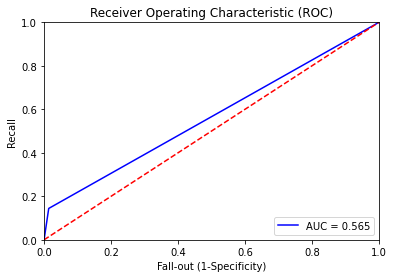

In [77]:
#Print Area Under Curve
false_positive_rate, recall, thresholds =roc_curve(y_test, cat_pred)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

# Evaluating the hypothesis
which states that a 20% discount will reduce the number of churning customers from 419

In [88]:
X_test.head()

,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p1_fix,price_p2_fix,Price_date Count,channels_ep,channels_ew,channels_fi,channels_fo,channels_lm,channels_sd,channels_us,origin_ewxe,origin_kamk,origin_ldks,origin_lxid,origin_usap,date_activ_year,date_end_year,date_modif_prod_year,date_renewal_year
12749,3.443106,0.0,2.623528,0.0,1.285557,0,0.000000,1.536053,0.404158,1,1.652150,3,13.337,1.447891,0.000000,428.446979,0.000000,12,0,0,0,1,0,0,0,0,0,0,1,0,2012,2016,2012,2015
8377,5.157179,0.0,2.899952,0.0,1.801747,0,1.411114,1.405176,0.381147,1,1.889470,6,13.200,1.438611,0.000000,425.815876,0.000000,12,0,0,0,0,1,0,0,0,1,0,0,0,2010,2016,2010,2015
11263,4.969924,0.0,3.904135,0.0,2.157215,0,2.837311,1.208441,0.344086,2,2.904099,4,26.000,1.163991,0.967521,390.215304,234.129169,12,0,0,0,0,1,0,0,0,0,1,0,0,2012,2016,2012,2015
747,3.826593,0.0,2.885683,0.0,1.395850,0,0.000000,0.898725,0.278462,1,1.772615,6,10.392,1.617818,0.829247,425.673652,0.000000,12,0,0,0,0,0,0,0,0,0,1,0,0,2010,2016,2015,2015
10135,4.704939,0.0,3.732542,0.0,2.124211,0,2.635393,1.681151,0.428321,1,2.658240,10,52.500,1.188166,0.995022,390.997296,234.598368,12,0,0,0,0,0,0,0,0,0,1,0,0,2005,2016,2015,2015


In [89]:
X_test.columns

Index(['cons_12m', 'cons_gas_12m', 'forecast_cons_12m',
       'forecast_discount_energy', 'forecast_meter_rent_12m', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'price_p1_var',
       'price_p2_var', 'price_p1_fix', 'price_p2_fix', 'Price_date Count',
       'channels_ep', 'channels_ew', 'channels_fi', 'channels_fo',
       'channels_lm', 'channels_sd', 'channels_us', 'origin_ewxe',
       'origin_kamk', 'origin_ldks', 'origin_lxid', 'origin_usap',
       'date_activ_year', 'date_end_year', 'date_modif_prod_year',
       'date_renewal_year'],
      dtype='object')

In [90]:
new = X_test


In [91]:
new.head()

,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p1_fix,price_p2_fix,Price_date Count,channels_ep,channels_ew,channels_fi,channels_fo,channels_lm,channels_sd,channels_us,origin_ewxe,origin_kamk,origin_ldks,origin_lxid,origin_usap,date_activ_year,date_end_year,date_modif_prod_year,date_renewal_year
12749,3.443106,0.0,2.623528,0.0,1.285557,0,0.000000,1.536053,0.404158,1,1.652150,3,13.337,1.447891,0.000000,428.446979,0.000000,12,0,0,0,1,0,0,0,0,0,0,1,0,2012,2016,2012,2015
8377,5.157179,0.0,2.899952,0.0,1.801747,0,1.411114,1.405176,0.381147,1,1.889470,6,13.200,1.438611,0.000000,425.815876,0.000000,12,0,0,0,0,1,0,0,0,1,0,0,0,2010,2016,2010,2015
11263,4.969924,0.0,3.904135,0.0,2.157215,0,2.837311,1.208441,0.344086,2,2.904099,4,26.000,1.163991,0.967521,390.215304,234.129169,12,0,0,0,0,1,0,0,0,0,1,0,0,2012,2016,2012,2015
747,3.826593,0.0,2.885683,0.0,1.395850,0,0.000000,0.898725,0.278462,1,1.772615,6,10.392,1.617818,0.829247,425.673652,0.000000,12,0,0,0,0,0,0,0,0,0,1,0,0,2010,2016,2015,2015
10135,4.704939,0.0,3.732542,0.0,2.124211,0,2.635393,1.681151,0.428321,1,2.658240,10,52.500,1.188166,0.995022,390.997296,234.598368,12,0,0,0,0,0,0,0,0,0,1,0,0,2005,2016,2015,2015


In [92]:
#calculating for 20% discount
col = ['price_p1_var',
       'price_p2_var', 'price_p1_fix', 'price_p2_fix']
for x in col:
  new[x] = new[x] - (new[x]*0.2)

In [93]:
new.head()

,cons_12m,cons_gas_12m,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p1_fix,price_p2_fix,Price_date Count,channels_ep,channels_ew,channels_fi,channels_fo,channels_lm,channels_sd,channels_us,origin_ewxe,origin_kamk,origin_ldks,origin_lxid,origin_usap,date_activ_year,date_end_year,date_modif_prod_year,date_renewal_year
12749,3.443106,0.0,2.623528,0.0,1.285557,0,0.000000,1.536053,0.404158,1,1.652150,3,13.337,1.158313,0.000000,342.757583,0.000000,12,0,0,0,1,0,0,0,0,0,0,1,0,2012,2016,2012,2015
8377,5.157179,0.0,2.899952,0.0,1.801747,0,1.411114,1.405176,0.381147,1,1.889470,6,13.200,1.150889,0.000000,340.652701,0.000000,12,0,0,0,0,1,0,0,0,1,0,0,0,2010,2016,2010,2015
11263,4.969924,0.0,3.904135,0.0,2.157215,0,2.837311,1.208441,0.344086,2,2.904099,4,26.000,0.931193,0.774017,312.172243,187.303335,12,0,0,0,0,1,0,0,0,0,1,0,0,2012,2016,2012,2015
747,3.826593,0.0,2.885683,0.0,1.395850,0,0.000000,0.898725,0.278462,1,1.772615,6,10.392,1.294255,0.663398,340.538922,0.000000,12,0,0,0,0,0,0,0,0,0,1,0,0,2010,2016,2015,2015
10135,4.704939,0.0,3.732542,0.0,2.124211,0,2.635393,1.681151,0.428321,1,2.658240,10,52.500,0.950533,0.796018,312.797837,187.678695,12,0,0,0,0,0,0,0,0,0,1,0,0,2005,2016,2015,2015


In [102]:
#@title Default title text
new_pred = cat.predict(new)

In [103]:
#2nd confusion metrix
print(confusion_matrix(y_test, new_pred))

[[3476  338]
 [ 315  108]]


In [104]:
# from this, it can be seen that a reduction of price has not impact on the churning rate, I even used XGBoost as my classifer in  another notebook I still got the same result
#I also tested by including the forcasted features I dropped in the previous notebook, I still got almost the same thing.

In [105]:
occurrences1 = np.count_nonzero(cat_pred == 1)
print(occurrences1)
occurrences2 = np.count_nonzero(new_pred == 1)
print(occurrences2)

114
446


# Comment
1. From the 1st confusion matrix and accuracy of the model, it can be said that is possible to use prediction model to predict customers that might churn, although model is not all that efficient in making predictions.

2. Comparing the first and second confusion matrix,  reduction in price across boards resulted into an increase of true negative.